> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Database_TMDb_movie_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

The TMDb movie data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

1. Explore the trend of profit and the number of movies
2. Explore the range of average vote
3. Explore the trend of profit of Universal Pictures

In [1]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

1. Remove unsue column 

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.drop(['id','imdb_id','genres','original_title','cast','homepage','director','tagline','keywords','overview','runtime','budget','revenue'], axis=1, inplace=True)
df.to_csv('tmdb-movies-edited.csv', index=False)
df_movies = pd.read_csv('tmdb-movies-edited.csv')
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
popularity              10866 non-null float64
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 679.2+ KB


2. Clean the data

In [5]:
# remove duplicate records
df_movies.drop_duplicates(inplace=True)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
popularity              10865 non-null float64
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 763.9+ KB


In [6]:
# remove records with zero value
df_clean_invalid_values = df_movies.replace(0,np.NaN)
df_movies = df_clean_invalid_values.dropna()
df_movies.to_csv('tmdb-movies-edited.csv', index=False)
df_movies = pd.read_csv('tmdb-movies-edited.csv')
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 8 columns):
popularity              3808 non-null float64
production_companies    3808 non-null object
release_date            3808 non-null object
vote_count              3808 non-null int64
vote_average            3808 non-null float64
release_year            3808 non-null int64
budget_adj              3808 non-null float64
revenue_adj             3808 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 238.1+ KB


3. Calculate the profit column

In [7]:
df_movies.insert(8,'profit',df_movies['revenue_adj']-df_movies['budget_adj'])
df_movies.to_csv('tmdb-movies-edited.csv', index=False)
df_movies = pd.read_csv('tmdb-movies-edited.csv')
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 9 columns):
popularity              3808 non-null float64
production_companies    3808 non-null object
release_date            3808 non-null object
vote_count              3808 non-null int64
vote_average            3808 non-null float64
release_year            3808 non-null int64
budget_adj              3808 non-null float64
revenue_adj             3808 non-null float64
profit                  3808 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 267.8+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: Explore the trend of profit and the number of movies

In [8]:
def movies_profit_trend(column_profit,column_year):
    df_movies = pd.read_csv('tmdb-movies-edited.csv')
    
    bins = [1960,1970,1980,1990,2000,2010]
    ind = np.digitize(df_movies[column_year], bins)
    
    df_profit = df_movies.groupby(ind)[column_profit].sum().to_frame()
    
    df_movies_count = df_movies.groupby(ind)[column_year].count().to_frame()
    X_axis = np.arange(1960,2015,10)
    
    fig,ax=plt.subplots()
    ax.plot(X_axis, df_profit[column_profit], color="red", marker="o")
    ax.set_xlabel('Release Year')
    ax.set_ylabel('Profit (dollars)', color="red")
    
    ax2=ax.twinx()
    ax2.plot(X_axis, df_movies_count[column_year], color="blue",marker="o")
    ax2.set_ylabel("Number of movies", color="blue")
    
    plt.show()

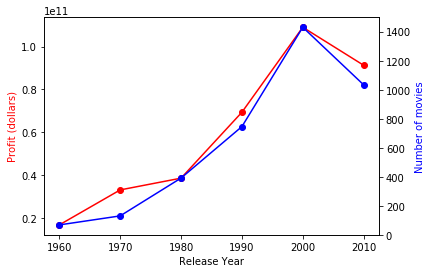

In [9]:
movies_profit_trend('profit','release_year')

##### Conclusions 
> The number of movies and their profit is increasing from 1960 to 2015. The film industry is still on the rise. 

### Research Question 2: Explore the range of average vote

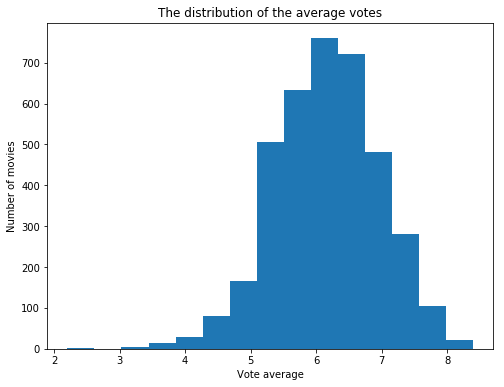

The highest vote:  8.4 , number of movies:  2
The lowest vote:  2.2 , number of movies:  1


In [10]:
data = df_movies['vote_average']
bins = np.linspace(df_movies['vote_average'].min(), df_movies['vote_average'].max(), 16)

# Create histogram
fig, ax = plt.subplots(figsize =(8, 6))
ax.hist(data, bins)
 
# Show plot
plt.xlabel('Vote average')
plt.ylabel('Number of movies')
plt.title('The distribution of the average votes')
plt.show()

max = df_movies['vote_average'].max()
min = df_movies['vote_average'].min()
print('The highest vote: ', max, ', number of movies: ', df_movies.query('vote_average == @max')['vote_average'].count())
print('The lowest vote: ', min, ', number of movies: ', df_movies.query('vote_average == @min')['vote_average'].count())


##### Conclusions 
> The average rating of movies is between 5 and 7

### Research Question 3: Explore the trend of profit of Universal Pictures

In [11]:
# prepare data
df_universal_pictures_movies = df_movies[df_movies['production_companies'].str.contains("Universal Pictures")]
df_universal_pictures_movies.to_csv('tmdb-universal-pictures-movies.csv', index=False)
df_universal_pictures_movies = pd.read_csv('tmdb-universal-pictures-movies.csv')
df_universal_pictures_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 9 columns):
popularity              332 non-null float64
production_companies    332 non-null object
release_date            332 non-null object
vote_count              332 non-null int64
vote_average            332 non-null float64
release_year            332 non-null int64
budget_adj              332 non-null float64
revenue_adj             332 non-null float64
profit                  332 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 23.4+ KB


In [12]:
def universal_trend(column_profit,column_year):
    df_movies = pd.read_csv('tmdb-universal-pictures-movies.csv')
    
    plt.figure(figsize=(8,3))
    
    plt.plot(df_movies.groupby(column_profit)[column_year].sum())
    
    plt.xlabel('Release Year')
    plt.ylabel('Profit')
    plt.title('The Universal Pictures profit year by year')
    plt.show()

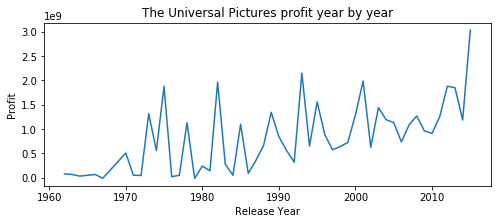

In [13]:
universal_trend('release_year','profit')

##### Conclutions
> Universal Pictures' profits are still on an upward trend from 1960 to 2015

<a id='conclusions'></a>
## Conclusions

In this investigation, we can find that the number of movies and their profit is increasing from year to year. This also applies to Universal Pictures as its profit is still on an upward trend from 1960 to 2015. We also find out that the average rating of movies is between 5 and 7, the lowest average vote 2.2 is and the highest average vote is 8.4. 

However, the above conclusion may be not accurate because of the lacking of data, since we removed many records with empty data.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [14]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0